## Importing and normalization of dataset

In [4]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


From the info method we can see that five of the features are represented by object datatypes, which means that we need to 

In [7]:
enc = preprocessing.OrdinalEncoder()
data[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]] = enc.fit_transform(data[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0,0.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0,0.0


# Creation of training and testing datasets

In [59]:
from keras.utils import to_categorical

X = np.array(data_scaled.drop(['HeartDisease'], 1))
y = np.array(data_scaled['HeartDisease'])

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train = to_categorical(y_train, num_classes=None)
y_test = to_categorical(y_test, num_classes=None)

## Creation of NN model

In [65]:
from keras import models
from keras import layers
from keras import regularizers
from keras.optimizers import Adam

def create_model():
    # create model
    model = models.Sequential()
    model.add(layers.Dense(16, input_dim=11, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                192       
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_15 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 18        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
             metrics=['accuracy'])

history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

Epoch 1/50
74/74 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5627 - val_loss: 0.6533 - val_accuracy: 0.5870
Epoch 2/50
74/74 [==============================] - 0s 771us/step - loss: 0.6290 - accuracy: 0.6948 - val_loss: 0.5809 - val_accuracy: 0.7717
Epoch 3/50
74/74 [==============================] - 0s 703us/step - loss: 0.5604 - accuracy: 0.7793 - val_loss: 0.5201 - val_accuracy: 0.8043
Epoch 4/50
74/74 [==============================] - 0s 703us/step - loss: 0.5234 - accuracy: 0.8065 - val_loss: 0.4690 - val_accuracy: 0.8098
Epoch 5/50
74/74 [==============================] - 0s 676us/step - loss: 0.5084 - accuracy: 0.7888 - val_loss: 0.4461 - val_accuracy: 0.8424
Epoch 6/50
74/74 [==============================] - 0s 690us/step - loss: 0.4647 - accuracy: 0.8038 - val_loss: 0.4202 - val_accuracy: 0.8261
Epoch 7/50
74/74 [==============================] - 0s 717us/step - loss: 0.4562 - accuracy: 0.8202 - val_loss: 0.4129 - val_accuracy: 0.8098
Epoch 8/

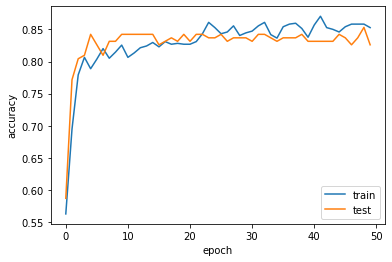

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

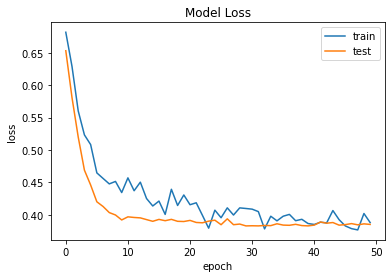

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()